<a href="https://colab.research.google.com/github/elina-india-mumbai/Gradient-boost/blob/main/Customer_churn_kn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.7 kB/s 
     |████████████████████████████████| 5.8 MB 56.1 MB/s 
     |████████████████████████████████| 1.6 MB 50.5 MB/s 
     |████████████████████████████████| 438 kB 63.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.1


In [ ]:
#import library functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset= pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X= dataset.iloc[:, 3:13]

In [ ]:
Y= dataset.iloc[:,-1]

In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
#Feature Engineeering
# convert all categorical variables into numerical
# scale the variables with StandardScaler

In [ ]:
geography =  pd.get_dummies(X['Geography'])

In [ ]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [ ]:
gender = pd.get_dummies(X['Gender'])

In [ ]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
 X = pd.concat([X,geography, gender], axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [ ]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
X_train.shape

(8000, 13)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
#Create an ANN network 
# import from tensorflow.keras
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#initialize ANN
classifier = Sequential()



In [ ]:
# Add input layer
classifier.add(Dense(units=20, activation='relu'))


In [85]:
# Add first hidden layer
classifier.add(Dense(units=15, activation='relu'))
classifier.add(Dropout(0.3))


In [86]:
# Add second hidden layer
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dropout(0.3))


In [87]:
# Add output layer
classifier.add(Dense(1, activation='sigmoid'))

In [88]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
#for early stopping refer to tensorflow.com
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [90]:
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size= 100, epochs=500, callbacks= early_stopping )

Epoch 1/500
54/54 [==============================] - 1s 7ms/step - loss: 0.6695 - accuracy: 0.7886 - val_loss: 0.6537 - val_accuracy: 0.8459
Epoch 2/500
54/54 [==============================] - 0s 5ms/step - loss: 0.6282 - accuracy: 0.8543 - val_loss: 0.6089 - val_accuracy: 0.8485
Epoch 3/500
54/54 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.8572 - val_loss: 0.5597 - val_accuracy: 0.8463
Epoch 4/500
54/54 [==============================] - 0s 5ms/step - loss: 0.5329 - accuracy: 0.8612 - val_loss: 0.5076 - val_accuracy: 0.8519
Epoch 5/500
54/54 [==============================] - 0s 5ms/step - loss: 0.4826 - accuracy: 0.8623 - val_loss: 0.4635 - val_accuracy: 0.8482
Epoch 6/500
54/54 [==============================] - 0s 5ms/step - loss: 0.4512 - accuracy: 0.8608 - val_loss: 0.4278 - val_accuracy: 0.8542
Epoch 7/500
54/54 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.8556 - val_loss: 0.4129 - val_accuracy: 0.8504
Epoch 8/500
5

In [91]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

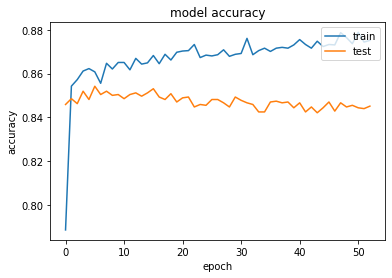

In [92]:
#plot history of the model for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [93]:
# Make predictions and evaluating the model
Y_pred = classifier.predict(X_test)
Y_pred= (Y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [94]:
# comstruct confussion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred )

In [95]:
cm

array([[1520,   75],
       [ 218,  187]])

In [97]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred, Y_test)

In [98]:
score

0.8535

In [102]:
#weights
weights = classifier.get_weights()

In [103]:
weights

[array([[-1.72802031e-01,  3.75015110e-01,  1.07627369e-01,
          3.87732297e-01, -2.65718973e-03, -8.70326534e-03,
          4.25051868e-01, -3.53349485e-02, -1.31466150e-01,
          1.93832472e-01,  2.48005882e-01, -1.01766966e-01,
         -5.91405094e-01,  4.89939302e-02,  1.49031594e-01,
          6.58889264e-02,  4.73338962e-01, -1.18887173e-02,
          1.13174155e-01, -1.21649131e-02],
        [ 9.21512395e-02,  3.32695320e-02,  2.82664895e-01,
         -2.02502921e-01, -4.81104881e-01,  2.42512692e-02,
         -1.88124552e-01,  1.30087942e-01, -6.86574206e-02,
          8.26462269e-01, -1.48872901e-02,  2.93472290e-01,
         -2.95895040e-01,  5.27870655e-01,  1.40757358e-03,
          5.50341368e-01,  5.38645029e-01, -6.58385932e-01,
         -1.67881370e-01, -6.32268906e-01],
        [ 1.64684579e-01, -3.26833576e-02, -1.76637486e-01,
          7.25749955e-02,  4.50777203e-01, -2.37655446e-01,
         -1.52524814e-01,  3.83617848e-01,  3.08624655e-01,
          2.